Figures for:

These are not the k-mers you are looking for: efficient online k-mer counting using a probabilistic data structure
==================================================================================================================

See the paper at: http://arxiv.org/abs/1309.2975

Table of Contents
=================

[Figure 1 - time usage of different k-mer counting tools](#Figure-1---time-usage-of-different-k-mer-counting-tools)

[Figure 2 - memory usage of different k-mer counting tools](#Figure-2---Memory-usage-of-different-k-mer-counting-tools)

[Figure 3 - Disk storage usage of different k-mer counting tools](#Figure-3---Disk-storage-usage-of-different-k-mer-counting-tools)

[Figure 4 - Comparison of time it takes to count k-mers](#Figure-4---Comparison-of-time-it-takes-to-count-k-mers)

[Figure 5 - relation between average miscount and counting error rate](#Figure-5---relation-between-average-miscount-and-counting-error-rate)

[Figure 6 - counting error rate vs miscount](#Figure-6---counting-error-rate-vs-miscount)

[Figure 7 - Percentage of the unique k-mers starting in different position in reads](#Figure-7---Percentage-of-the-unique-k-mers-starting-in-different-position-in-reads)

[Tables](#Tables)

[Supplimentary - determine the optimal parameters of hash tables to use](#Supplimentary---determine-the-optimal-parameters-of-hash-tables-to-use)

In [26]:
#%pylab inline
from __future__ import print_function

In [27]:
import seaborn

In [28]:
import seaborn as sns

In [29]:
# you may need to:
#
#!pip install --upgrade six
# !pip install --upgrade statsmodels
#
# and then restart the ipython notebook kernel.

In [30]:
import numpy
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

datadir = '../data/'
figsize=(12,6)

# also try "whitegrid" for white background
sns.set(style="darkgrid", font="Serif")
sns.set_palette("deep", n_colors=10, desat=.8)

In [31]:
# palette can be changed around
# see other options: http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps
c_khmer, c_ty, c_jf, c_dsk, c_kmc, c_bfc, c_t, c_k = sns.color_palette("Set1", 8)
c_meta,c_rk, c_re , c_ec =sns.color_palette("Set1", 4)
k17, k32 =sns.color_palette("Set1", 2)
# set all widths the same
lineparams = {'markersize':8.0, 'lw':2.0}

# keep each tool's format consistent
s_khmer = {'marker': 'o', 'c': c_khmer}
s_khmer.update(lineparams)

s_ty = {'marker': '^', 'c': c_ty}
s_ty.update(lineparams)

s_jf = {'marker': 'h', 'c': c_jf}
s_jf.update(lineparams)

s_dsk = {'marker': 's', 'c': c_dsk}
s_dsk.update(lineparams)

s_kmc = {'marker': 'v', 'c': c_kmc}
s_kmc.update(lineparams)

s_bfc = {'marker': 'D', 'c': c_bfc}
s_bfc.update(lineparams)

s_t = {'marker': 'p', 'c': c_t}
s_t.update(lineparams)

s_k = {'marker': 'p', 'c': c_k}
s_t.update(lineparams)

# 
s_meta = {'marker': 'h', 'c': c_meta}
s_meta.update(lineparams)

s_rk = {'marker': 's', 'c': c_rk}
s_rk.update(lineparams)

s_re = {'marker': 'v', 'c': c_re}
s_re.update(lineparams)

#s_rwe = {'marker': 'D', 'c': c_rwe}
#s_rwe.update(lineparams)

s_ec = {'marker': 'p', 'c': c_ec}
s_ec.update(lineparams)

s_k17 = {'c': k17}
s_k17.update(lineparams)

s_k32 = {'c': k32}
s_k32.update(lineparams)


In [32]:
def get_time_mem(filename):
    "Extract the user time and max memory as generated by 'time' command"
    for line in open(filename):
        line = line.rstrip()
        if 'system' in line:
            fields1 = line.split('user')
            time1 = float(fields1[0])
            fields1b = line.split('system')[0].split()[-1]
            time2 = float(fields1b)
            
            walltime = line.split('elapsed')[0].split()[-1].rsplit(':')
            assert len(walltime) <= 3
            hours = 0.
            minutes = 0.
            seconds = walltime[-1]
            if len(walltime) == 3:
                hours = float(walltime[0])
                minutes = float(walltime[1])
            elif len(walltime) == 2:
                minutes = float(walltime[0])
                
            wall_seconds = hours*60*60 + minutes*60 + float(walltime[1])
            
            time = wall_seconds
            fields2 = line.split('avgdata ')
            fields3 = fields2[1].split('max')
            mem = str(int(fields3[0])/4)
            return float(time), float(mem)
    raise Exception(filename)


In [33]:
# read time files



mkindex_time={}
mkindex_mem={}
suffix_time={}
suffix_mem={}

# tallymer runtime info
# part=1 k=22 

for i1 in range(1,6):
    for i2 in [1]:
        for i3 in [22]:
            name = "%d_%d_%d" % (i1, i2, i3)
            filename = 'mkindex_%d_part%d_%d.time' % (i1, i2, i3)
            filename = datadir + filename
            mkindex_time[name],mkindex_mem[name] = get_time_mem(filename)

        name = "%d_%d" % (i1, i2)
        filename = datadir + 'suffix_%d_part%d.time' % (i1, i2)
        suffix_time[name],suffix_mem[name] = get_time_mem(filename)

# read jellyfish 
# k=22 and k=31

jelly_count_mem = {}
jelly_count_time = {}
for i1 in range(1,6):
    for i2 in [22,31]:
        name = "%d_%d" % (i1, i2)
        filename = datadir + 'jelly_%d_%d.time1' % (i1, i2)
        jelly_count_time[name],jelly_count_mem[name] = get_time_mem(filename)

 
jelly_hist_mem = {}
jelly_hist_time = {}
for i1 in range(1,6):
    for i2 in [22,31]:
        name = "%d_%d" % (i1, i2)
        filename = datadir + 'jelly_%d_%d.time2' % (i1, i2)
        jelly_hist_time[name],jelly_hist_mem[name] = get_time_mem(filename)

# DSK use k=22

dsk_mem = {}
dsk_time = {}
for i1 in range(1,6):
    for i2 in [22]:
        name = "%d_%d" % (i1, i2)
        filename = datadir+'dsk_%d_%d.time' % (i1, i2)
        dsk_time[name], dsk_mem[name] = get_time_mem(filename)

# khmer use k=22 only, error rate=1%， 5% and 20%

khmer_mem1 = {}
khmer_time1 = {}

for i1 in range(1,6):
    for i2 in [1,5,20]:
        for i3 in [22]:
            name = "%d_%d_%d" % (i1, i2, i3)
            filename = datadir +'bloom_%d_%d_%d.hist.time' % (i1, i2, i3)
            khmer_time1[name],khmer_mem1[name] = get_time_mem(filename)

    
#khmer_mem2 = {}
#khmer_time2 = {}

#for i1 in range(1,6):
#    for i2 in [1,5,20]:
#        for i3 in [22]:
#            name = "%d_%d_%d" % (i1, i2, i3)
#            filename = datadir +'bloom_%d_%d_%d.time2' % (i1, i2, i3)
#            khmer_time2[name],khmer_mem2[name] = get_time_mem(filename)


kmc_mem = {}
kmc_time = {}
for i1 in range(1,6):
    for i2 in [22]:
        name = "%d_%d" % (i1, i2)
        filename = datadir+'kmc_%d_%d.time' % (i1, i2)
        kmc_time[name], kmc_mem[name] = get_time_mem(filename)
        

kmc_dump_mem = {}
kmc_dump_time = {}
for i1 in range(1,6):
    for i2 in [22]:
        name = "%d_%d" % (i1, i2)
        filename = datadir+'kmc_dump_%d_%d.time' % (i1, i2)
        kmc_dump_time[name], kmc_dump_mem[name] = get_time_mem(filename)
        
bfcount_mem = {}
bfcount_time = {}
for i1 in range(1,6):
    for i2 in [22]:
        name = "%d_%d" % (i1, i2)
        filename = datadir+'BF_count_%d.time' % (i1)
        bfcount_time[name], bfcount_mem[name] = get_time_mem(filename)
        
bfdump_mem = {}
bfdump_time = {}
for i1 in range(1,6):
    for i2 in [22]:
        name = "%d_%d" % (i1, i2)
        filename = datadir+'BF_dump_%d.time' % (i1)
        bfdump_time[name], bfdump_mem[name] = get_time_mem(filename)
        
turtle_mem = {}
turtle_time = {}
for i1 in range(1,6):
    for i2 in [22]:
        name = "%d_%d" % (i1, i2)
        filename = datadir+'turtle_%d_%d.time' % (i1, i2)
        turtle_time[name], turtle_mem[name] = get_time_mem(filename)       

kanalyze_mem = {}
kanalyze_time = {}
for i1 in range(1,6):
        name = "%d_%d" % (i1, 22)
        filename = datadir+'kanalyze_%d.time' % (i1,)
        print (filename)
        kanalyze_time[name], kanalyze_mem[name] = get_time_mem(filename)       
print (kanalyze_mem)
print ("1")

../data/kanalyze_1.time
../data/kanalyze_2.time
../data/kanalyze_3.time
../data/kanalyze_4.time
../data/kanalyze_5.time
{'1_22': 7221044.0, '2_22': 7106256.0, '3_22': 7119244.0, '4_22': 7122028.0, '5_22': 7378396.0}
1


In [34]:
# number of distinct 22-mers in different data sets

def get_total_kmers(filename):
    total = 0
    for line in open(filename):
        line = line.rstrip()
        fields = line.split()
        total = total + int(fields[1])
    return total
total_list = []
for i in range(1,6):
    filename = datadir+'jelly_%d_22.hist' % (i)
    total = get_total_kmers(filename)
    total_list.append(float(total) / 1e9)

print (kmc_mem,kmc_time,"test")


{'1_22': 2741064.0, '2_22': 4710916.0, '3_22': 5075284.0, '4_22': 5122148.0, '5_22': 4962980.0} {'1_22': 44.69, '2_22': 94.94, '3_22': 146.56, '4_22': 229.79, '5_22': 353.9} test


## Figure 1 - time usage of different k-mer counting tools

In [35]:
time_khmer = [] # 1% error rate , k=22
time_tallymer = [] # k=22,  time usage is the same for part=1 or part=4, only use part=1 here
time_jellyfish_k22 = [] # use k=22, but memory change with different k size. k=31. 
time_dsk = [] # use k=22.
time_kmc = []
time_BF = []
time_turtle = []
time_kanalyze = []
for i in range(1,6):
    time_khmer.append(khmer_time1[str(i)+'_1_22'])
    time_tallymer.append(suffix_time[str(i)+'_1']+mkindex_time[str(i)+'_1_22'])
    time_jellyfish_k22.append(jelly_count_time[str(i)+'_22'] + jelly_hist_time[str(i)+'_22'])
    time_dsk.append(dsk_time[str(i)+'_22'])
    time_kmc.append(kmc_time[str(i)+'_22']+kmc_dump_time[str(i)+'_22'])
    time_BF.append(bfcount_time[str(i)+'_22']+ bfdump_time[str(i)+'_22'])
    time_turtle.append(turtle_time[str(i)+'_22'])
    time_kanalyze.append(kanalyze_time[str(i)+'_22'])
#for i in range(1,3):
 #   L_turtle.append(turtle_time[str(i)+'_22'])
time_khmer

[392.33, 803.79, 1160.09, 1482.18, 1845.94]

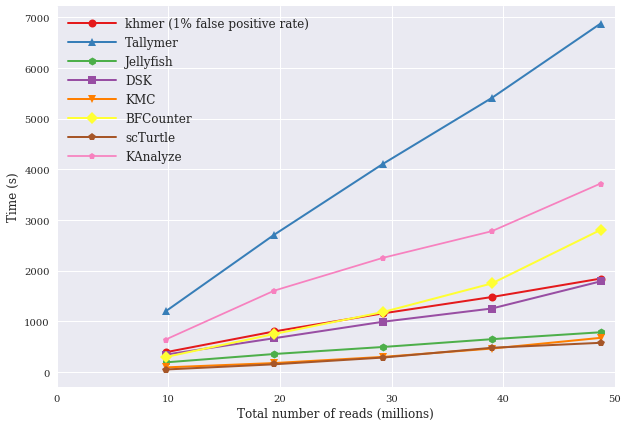

In [36]:
# fig 1

#f, axarr = plt.subplots(2, sharex=True)
#f.set_size_inches(10,7)
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(10,7)



read_counts = [9744399, 19488798, 29233197, 38977596, 48721995]    
read_counts = [ float(x) / 1e6 for x in read_counts ]

#############
# top subplot
#############

#ax = axarr[0]
ax.set_ylabel('Time (s)',fontsize=12)

ax.plot(read_counts, time_khmer,'-', label='khmer (1% false positive rate)', **s_khmer)
ax.plot(read_counts, time_tallymer,'-', label='Tallymer', **s_ty)
ax.plot(read_counts, time_jellyfish_k22,'-', label='Jellyfish', **s_jf)
ax.plot(read_counts, time_dsk,'-', label='DSK', **s_dsk)
ax.plot(read_counts, time_kmc,'-', label='KMC', **s_kmc)
ax.plot(read_counts, time_BF,'-', label='BFCounter', **s_bfc)
ax.plot(read_counts, time_turtle,'-', label='scTurtle', **s_t)
ax.plot(read_counts, time_kanalyze,'-', label='KAnalyze', **s_k)
ax.set_xlim(0,50)
ax.legend(loc='best',handlelength=4,prop={'size':12}) #,prop={'size':8})


################
# bottom subplot
################

#ax = axarr[1]

#ax.plot(read_counts, time_khmer,'-', label='khmer (1% error rate)', **s_khmer)

#ax.plot(read_counts, time_jellyfish_k22,'-', label='Jellyfish', **s_jf)
#ax.plot(read_counts, time_dsk,'-', label='DSK', **s_dsk)
#ax.plot(read_counts, time_kmc,'-', label='KMC', **s_kmc)
#ax.plot(read_counts, time_BF,'-', label='BFCounter', **s_bfc)
#ax.plot(read_counts, time_turtle,'-', label='scTurtle', **s_t)
#ax.plot(read_counts, time_kanalyze,'-', label='KAnalyze', **s_k)
ax.set_xlim(0,50)
ax.set_xlabel('Total number of reads (millions)',fontsize=12)
ax.set_ylabel('Time (s)',fontsize=12)

ax.legend(loc='best',handlelength=4,prop={'size':12}) #,prop={'size':8})
#fig_file = '../figure/time_benchmark.eps'
#fig_file = '../figure/time_benchmark.pdf'
fig_file = 'test.pdf'

plt.savefig(fig_file,dpi=300)

## Figure 2 - Memory usage of different k-mer counting tools

In [37]:
mem_khmer_1p = [] # 1% error rate , k=22
mem_khmer_5p = [] # 5% error rate, k=22
mem_khmer_20p = [] # 20% error rate, k=22
mem_tallymer = [] # k=22, pick biggest memory, suffix 1 part and 4 parts different memory ,but all smaller than mkindex step(same with part1 or part4). 
mem_jellyfish_k22 = [] # use k=22, but memory change with different k size. k=31. 
mem_jellyfish_k31 = []
mem_dsk = [] # use k=22.
mem_kmc = []
mem_BF = []
mem_turtle = []
mem_kanalyze = []

for i in range(1,6):

    mem_khmer_1p.append(khmer_mem1[str(i)+'_1_22']/1000000)
    mem_khmer_5p.append(khmer_mem1[str(i)+'_5_22']/1000000)
    mem_khmer_20p.append(khmer_mem1[str(i)+'_20_22']/1000000)
    mem_tallymer.append(mkindex_mem[str(i)+'_1_22']/1000000) # memory usage of mkindex is always bigger than suffix(part1/4)
    if jelly_count_mem[str(i)+'_22'] > jelly_hist_mem[str(i)+'_22']:
        mem_jellyfish_k22.append(jelly_count_mem[str(i)+'_22']/1000000)
    else:
        mem_jellyfish_k22.append(jelly_hist_mem[str(i)+'_22']/1000000)

    if jelly_count_mem[str(i)+'_31'] > jelly_hist_mem[str(i)+'_31']:
        mem_jellyfish_k31.append(jelly_count_mem[str(i)+'_31']/1000000)
    else:
        mem_jellyfish_k31.append(jelly_hist_mem[str(i)+'_31']/1000000)
        
    mem_dsk.append(dsk_mem[str(i)+'_22']/1000000)
    
    if kmc_mem[str(i)+'_22'] > kmc_dump_mem[str(i)+'_22']:
        mem_kmc.append(kmc_mem[str(i)+'_22']/1000000)
    else:
        mem_kmc.append(kmc_dump_mem[str(i)+'_22']/1000000)
 
    if bfcount_mem[str(i)+'_22'] > bfdump_mem[str(i)+'_22']:
        mem_BF.append(bfcount_mem[str(i)+'_22']/1000000)
    else:
        mem_BF.append(bfdump_mem[str(i)+'_22']/1000000)
    mem_turtle.append(turtle_mem[str(i)+'_22']/1000000)
    mem_kanalyze.append(kanalyze_mem[str(i)+'_22']/1000000)


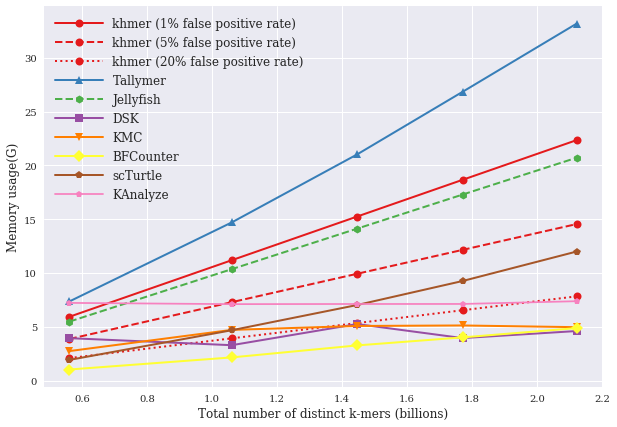

In [38]:
# 2. memory usage of different k-mer counting tools, growing

#f, axarr = plt.subplots(2, sharex=True)
#f.set_size_inches(10,7)

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(10,7)



#############
# top subplot
#############



ax.set_ylabel('Memory usage(G)',fontsize=12)
ax.set_xlabel('Total number of distinct k-mers (billions)',fontsize=12)
ax.plot(total_list, mem_khmer_1p,'-', label='khmer (1% false positive rate)', **s_khmer)
ax.plot(total_list, mem_khmer_5p,'--', label='khmer (5% false positive rate)', **s_khmer)
ax.plot(total_list, mem_khmer_20p,':', label='khmer (20% false positive rate)', **s_khmer)
ax.plot(total_list, mem_tallymer,'-', label='Tallymer', **s_ty)
ax.plot(total_list, mem_jellyfish_k22,'--', label='Jellyfish', **s_jf)
ax.plot(total_list, mem_dsk,'-', label='DSK', **s_dsk)
ax.plot(total_list, mem_kmc,'-', label='KMC', **s_kmc)
ax.plot(total_list, mem_BF,'-', label='BFCounter', **s_bfc)
ax.plot(total_list, mem_turtle,'-', label='scTurtle', **s_t)
ax.plot(total_list, mem_kanalyze,'-', label='KAnalyze', **s_k)
#print L_turtle
#ax.set_xlim(0,2.3)
#ax.set_ylim(0,35)
ax.legend(loc='upper left',handlelength=4,prop={'size':12}) #,prop={'size':8})

################
# bottom subplot
################


#ax = axarr[1]
#ax.set_xlabel('Total number of distinct k-mers (billions)',fontsize=12)
#ax.set_ylabel('Memory usage(G)',fontsize=12)

#ax.plot(total_list, mem_khmer_1p,'-', label='khmer (1% error rate)', **s_khmer)
#ax.plot(total_list, mem_khmer_5p,'--', label='khmer (5% error rate)', **s_khmer)
#ax.plot(total_list, mem_khmer_20p,':', label='khmer (20% error rate)', **s_khmer)

#ax.plot(total_list, mem_jellyfish_k22,'--', label='Jellyfish', **s_jf)
#ax.plot(total_list, mem_jellyfish_k31,'-', label='Jellyfish k=31', **s_jf)
#ax.plot(total_list, mem_dsk,'-', label='DSK', **s_dsk)
#ax.plot(total_list, mem_kmc,'-', label='KMC', **s_kmc)
#ax.plot(total_list, mem_BF,'-', label='BFCounter', **s_bfc)
#ax.plot(total_list, mem_turtle,'-', label='scTurtle', **s_t)
#ax.plot(total_list, mem_kanalyze,'-', label='kanalyze', **s_k)
#ax.set_xlim(0,2.3)
#ax.legend(loc='upper left',handlelength=4,prop={'size':12}) #,prop={'size':8})


fig_file = '../figure/memory_benchmark.pdf'
#fig_file = '../figure/memory_benchmark.eps'
plt.savefig(fig_file,dpi=300)

memory usage of khmer is larger than predicted, which is the "maxresident" in time output.

## Figure 3 - Disk storage usage of different k-mer counting tools

In [39]:
file_ls = open("../data/ls.log",'r')
size = {}
file_ls.readline()
for line in file_ls:
#    print line
    line = line.rstrip()
    fields = line.split()
    size[fields[-1]] = int(fields[-5])


# BFCount: 
# ----
# bloom filter based, only count non-unique k-mers: (frequency>1)
# 
# two steps: 
# 
# - BFCounter count - counting     - output temparary binary file
# - BFCounter dump - get the frequency of non-unique k-mers - write to hard disk the text files
# 
# Estimated number of k-mers (upper bound) was used, which is acquired from actual distinct k-mers in test datasets.
# This will influence the memory usage and disk usage.



L_BF = []
for i in range(1,6):
    size_total = size['iowa.'+str(i)]+size['iowa.'+str(i)+'.txt']
    L_BF.append(size_total/1000000000.0)
print(L_BF)
    


# KMC
# ----------
# like DSK, hard disk based
# 
# two steps:
# 
# - kmc - the main program for counting k-mer occurrences - output temparary binary files \*.kmc_pre and \*.kmc_suf
# - kmc_dump - the program listing k-mers in a database produced by kmc - output text file to contain k-mers and counts
# 


L_KMC = []
for i in range(1,6):
    size_total = size['kmc_'+str(i)+'_22.out.kmc_pre']+size['kmc_'+str(i)+'_22.out.kmc_suf']+size['kmc_dump_'+str(i)+'_22.out']
    L_KMC.append(size_total/1000000000.0)
print L_KMC
    


# Turtle
# --------
# like BFCounter, only counts frequent k-mers, count>1
# 
# based on enhanced Bloom Filter
# 
# Two subprograms:
# 
# - scTurtle: reports k-mers with frequency >1 with counts
# - aTurtle: reports all k-mers with counts
# - cTurtle: reports k-mers with frequency >1 but not their counts
# 
# Tried aTurtle , failed to finish dataset 3, 4, 5
# 
# Tried scTurtle, the same, shown in figure
# 


L_Turtle = []
for i in range(1,6):
    size_total = 0
    for k in range(7):
        size_total = size_total+ size['turtle_'+str(i)+'_22.out'+str(k)]
        
    L_Turtle.append(size_total/1000000000.0)
print (L_Turtle)



# kanalyze , use 2G memory, also lots of temperatre files, as large as output file


L_kanalyze = []
for i in range(1,6):
    size_total = size['kanalyze_'+str(i)+'.out']
    L_kanalyze.append(size_total/1000000000.0)
print (L_kanalyze)



SyntaxError: Missing parentheses in call to 'print'. Did you mean print(L_KMC)? (<ipython-input-39-3329aca13651>, line 48)

In [ ]:
# 3. disk usage of different k-mer counting tools
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(10,7)


# from size of intermediant files on hard disk, will modify to automatically generate
L_khmer = [5.5,11,15,18,21] # 1% error rate , k=22
L_tallymer = [7.8,17,23,28,36] # k=22, pick biggest memory, suffix 1 part and 4 parts different memory ,but all smaller than mkindex step. 
L_jellyfish_k22 = [5.3,9.9,14,17,20] # use k=22, but memory change with different k size. k=31. 
L_dsk = [1.1,2.1,3.0,3.8,4.7] # use k=22. by default, use the size of reads file as disk usage parameter
L_khmer_gz = [1284585409. / 1e9,2491325096. / 1e9, 3439743439./1e9,4254327173./1e9,5151176537./1e9]

ax.set_xlabel('Total number of distinct k-mers (billions)',fontsize=12)
ax.set_ylabel('Disk usage (GB)',fontsize=12)

ax.plot(total_list,L_khmer, linestyle='-', label='khmer (1% false positive rate)*', **s_khmer)
ax.plot(total_list,L_khmer_gz, linestyle='--', label='khmer (1% false positive rate), gzip-compressed', **s_khmer)
ax.plot(total_list,L_tallymer, linestyle='-', label='Tallymer', **s_ty)
ax.plot(total_list,L_jellyfish_k22, linestyle='-', label='Jellyfish', **s_jf)
ax.plot(total_list,L_dsk, linestyle='-', label='DSK', **s_dsk)
ax.plot(total_list,L_KMC,linestyle='-', label='KMC',**s_kmc)
ax.plot(total_list,L_BF,linestyle='-', label='BFCounter',**s_bfc)
ax.plot(total_list,L_Turtle,linestyle='-', label='scTurtle',**s_t)
ax.plot(total_list,L_kanalyze,'-', label='KAnalyze', **s_k)

ax.set_ylim(0,60)
ax.legend(loc='upper left', handlelength=4,prop={'size':12}) #,prop={'size':8})
#fig_file = '../figure/disk_benchmark.eps'
fig_file = '../figure/disk_benchmark.pdf'
plt.savefig(fig_file,dpi=300)

## Figure 4 - Comparison of time it takes to count k-mers

In [ ]:
tally_count = [ get_time_mem('../data/1_part1_22.count.time')[0],
                get_time_mem('../data/2_part1_22.count.time')[0],
                get_time_mem('../data/3_part1_22.count.time')[0],
                get_time_mem('../data/4_part1_22.count.time')[0],
                get_time_mem('../data/5_part1_22.count.time')[0] ]

khmer_count = [ get_time_mem('../data/bloom_1_1_22.count.time')[0],
                get_time_mem('../data/bloom_2_1_22.count.time')[0],
                get_time_mem('../data/bloom_3_1_22.count.time')[0],
                get_time_mem('../data/bloom_4_1_22.count.time')[0],
                get_time_mem('../data/bloom_5_1_22.count.time')[0] ]

jelly_count = [ get_time_mem('../data/jelly_1_22.count.time')[0],
                get_time_mem('../data/jelly_2_22.count.time')[0],
                get_time_mem('../data/jelly_3_22.count.time')[0],
                get_time_mem('../data/jelly_4_22.count.time')[0],
                get_time_mem('../data/jelly_5_22.count.time')[0] ]


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(10,7)

ax.plot(total_list, khmer_count, linestyle='-', label='khmer (1% false positive rate)', **s_khmer)
ax.plot(total_list, tally_count, linestyle='-', label='Tallymer', **s_ty)
ax.plot(total_list, jelly_count, linestyle='-', label='Jellyfish', **s_jf)

ax.legend(loc='best',handlelength=4,prop={'size':12})#,prop={'size':8}
#ax.set_ylim(0,1600)
ax.set_xlabel('Total number of distinct k-mers (billions)',fontsize=12)
ax.set_ylabel('Time (s)', fontsize=12)
fig_file = '../figure/count_benchmark.pdf'
#fig_file = '../figure/count_benchmark.eps'
plt.savefig(fig_file,dpi=300)

## Figure 5 - relation between average miscount and counting error rate

In [ ]:
ht_size = "100000,200000,400000,600000,800000,1000000,1200000,1400000,1800000,2200000,2600000,3000000,4000000,6000000"
HT_SIZE_array = map(int,ht_size.split(','))


file_obj = open(datadir+'fp_assessment.out','r')
lines = file_obj.readlines()
result1 = [map(float,lines[1].split()),map(float,lines[2].split())]
result2 = [map(float,lines[5].split()),map(float,lines[6].split())]
result3 = [map(float,lines[9].split()),map(float,lines[10].split())]
result4 = [map(float,lines[13].split()),map(float,lines[14].split())]
result5 = [map(float,lines[17].split()),map(float,lines[18].split())]
fig = plt.figure()
ax = fig.add_subplot(111)
#fig.set_size_inches(6.83,4)
fig.set_size_inches(10,7)


ax.set_xlabel('Counting false positive rate (miscount>0)',fontsize=12)
ax.set_ylabel('Average miscount',fontsize=12)
#ax.plot(total_list, khmer_count, linestyle='-', label='khmer (1%)', **s_khmer)


ax.plot(result1[1],result1[0],linestyle='-', label='metagenome data', **s_meta)
ax.plot(result2[1],result2[0],linestyle='-', label='random k-mers', **s_rk)
ax.plot(result3[1],result3[0],linestyle='-', label='reads with error', **s_re)
ax.plot(result4[1],result4[0],linestyle='--', label='reads without error', **s_re)
ax.plot(result5[1],result5[0],linestyle='-', label='E.coli reads', **s_ec)

#        result2[1],result2[0],'go-',result3[1],result3[0],'bo-',result4[1],result4[0],'yo-',result5[1],result5[0],'ko-')
#ax.set_xlim(0,0.2)
#ax.set_ylim(0,20)
ax.axis(ymax=10, ymin=0)
ax.legend(loc='upper left',handlelength=4,prop={'size':12})#,prop={'size':8}
#fig_file = '../figure/average_offset_vs_fpr.eps'
fig_file = '../figure/average_offset_vs_fpr.pdf'
plt.savefig(fig_file,dpi=300)



## Figure 6 - counting error rate vs miscount

y-axis is the average of (offset/correct_count) for each k-mer

Since the high diversity dataset, most of the accurate counts are 1, so for smaller hash table(high error rate), the offset(miscount) may be 2 or 3. That percentage will be 100%-200%, which is the case in the figure while counting error rate >0.7

In [ ]:
ht_size = "100000,200000,400000,600000,800000,1000000,1200000"
HT_SIZE_array = map(int,ht_size.split(','))


file_obj = open(datadir+'fp_assessment.out','r')
lines = file_obj.readlines()
result1 = numpy.array([map(float,lines[3].split()),map(float,lines[2].split())])
result1[0] *= 100.
result2 = numpy.array([map(float,lines[7].split()),map(float,lines[6].split())])
result2[0] *= 100.
result3 = numpy.array([map(float,lines[11].split()),map(float,lines[10].split())])
result3[0] *= 100.
result4 = numpy.array([map(float,lines[15].split()),map(float,lines[14].split())])
result4[0] *= 100.
result5 = numpy.array([map(float,lines[19].split()),map(float,lines[18].split())])
result5[0] *= 100.

fig = plt.figure()
ax = fig.add_subplot(111)
#fig.set_size_inches(6.83,4)
fig.set_size_inches(10,7)


ax.set_xlabel('Counting false positive rate (miscount > 0)',fontsize=12)
ax.set_ylabel('Average miscount (percent)',fontsize=12)

ax.plot(result1[1],result1[0],linestyle='-', label='metagenome data', **s_meta)
ax.plot(result2[1],result2[0],linestyle='-', label='random k-mers', **s_rk)
ax.plot(result3[1],result3[0],linestyle='-', label='reads with error', **s_re)
ax.plot(result4[1],result4[0],linestyle='--', label='reads without error', **s_re)
ax.plot(result5[1],result5[0],linestyle='-', label='E.coli reads', **s_ec)


#ax.plot(result1[1],result1[0],'ro-',result2[1],result2[0],'go-',result3[1],result3[0],'bo-',result4[1],result4[0],'yo-',result5[1],result5[0],'ko-')
#ax.set_xlim(0,1)
ax.set_ylim(0,100)
ax.legend(loc='upper left',handlelength=4,prop={'size':12}) #,prop={'size':8}
#fig_file = '../figure/percent_offset_vs_fpr.eps'
fig_file = '../figure/percent_offset_vs_fpr.pdf'
plt.savefig(fig_file,dpi=300)
#ax.axis(ymax=1)

## Figure 7 - Percentage of the unique k-mers starting in different position in reads

In [ ]:

file17 = open(datadir+"ecoli_ref.fastq.pos17.abund1",'r')
file32 = open(datadir+"ecoli_ref.fastq.pos32.abund1",'r')

list1 = []
list2 = []
x1 = []
x2 = []

for line in file17:
    line = line.rstrip()
    fields = line.split()
    if fields[1] != '0':
        x1.append(float(fields[0]))
        list1.append(float(fields[1]))

for line in file32:
    line = line.rstrip()
    fields = line.split()
    if fields[1] != '0':
        x2.append(float(fields[0]))
        list2.append(float(fields[1]))

fig = plt.figure()

ax = fig.add_subplot(111)
fig.set_size_inches(10,7)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.set_xlabel("Starting position of k-mer in read",fontsize=12)
ax.set_ylabel("Number of abund=1 k-mers at that position",fontsize=12)


ax.plot(x1,list1,linestyle='-', label='k=17', **s_k17)
ax.plot(x2,list2,linestyle='-', label='k=32', **s_k32)

#ax.plot(x1,list1,'r-')
#ax.plot(x2,list2,'b-')
ax.legend(loc='upper left',prop={'size':12})
#plt.ylim(0,10000000)
ax.set_xlim(0,100)

#plt.savefig("../figure/perc_unique_pos.eps",dpi=300)
plt.savefig("../figure/perc_unique_pos.pdf",dpi=300)

# Tables

Table 3
==========
Iterative low-memory k-mer trimming. The results of trimming reads at unique (erroneous) k-mers from a 1.41Gbp short-read data set in under 30 MB of RAM. After each iteration, we measured the total number of distinct k-mers in the data set, the total number of unique (and likely erroneous, with frequency = 1) k-mers remaining, and the number of unique k-mers present at the 3’ end of reads.

In [ ]:
def human_format(num):
    magnitude = 0
    while num >= 1000:  # TODO: handle negative numbers?
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.1f%s' % (num, ['', 'K', 'M', 'G', 'T', 'P'][magnitude])

print('the answer is %s' % human_format(7436313))  # prints 'the answer is 7.44M'

In [ ]:
# get fp rate of filter-abund,  get discarded percentage of bases and get processed_bases(for other trimming method output file)
# from ecoli_ref.fastq.r1.fq.out  -< filter-abund-single.py
def read_out_file(file_out):

    fp_out = open(file_out,'r')
    for line in fp_out:
        if "discarded" in line:
            percent = line.split()[1]
        if "fp rate estimated to be" in line:
            fp = float(line.split()[5])
        if "processed" in line:
            processed_bases = int(line.split()[1])
        
    return "{:.1f}%".format(fp * 100), percent, processed_bases



In [ ]:
def read_diginorm_out_file(file_out):

    fp_out = open(file_out,'r')
    for line in fp_out:
        if "DONE with" in line:
            percent = float(line.split()[-2])
            kept_reads = line.split()[-6]
            all_reads = line.split()[-4]
        if "fp rate estimated to be" in line:
            fp = float(line.split()[5])

    return "{:.1f}%".format(fp * 100),"{:.1f}%".format(percent) , '{:,}'.format(int(kept_reads)),'{:,}'.format(int(all_reads))


In [ ]:
#file_out = "../data/ecoli_ref.fastq.ka.r1.fq.hist"
# get number of unique k-mers(freq=1) and number of total distinct k-mers.
def read_hist_file(file_out):
    fp_out = open(file_out,'r')
    for line in fp_out:
        line = line.rstrip()
        fields = line.split()
        if fields[0] == '1':
            unique_num = int(fields[1])
        all_num = int(fields[2])
    return human_format(unique_num),human_format(all_num)

In [ ]:
# ecoli_ref.fastq.kh.e_coli_ref_hist
def read_e_coli_ref_hist_file(file_out):
    fp_out = open(file_out,'r')
    for line in fp_out:
        line = line.rstrip()
        fields = line.split()
        if fields[0] == '0':
            missing_kmers = str(fields[1])
    return missing_kmers

In [ ]:
#file_out = "../data/ecoli_ref.fastq.ka.r1.fq.endcount"
def read_endcount_file(file_out):
    
    fp_out = open(file_out,'r')
    for line in fp_out:
        line = line.rstrip()
        fields = line.split()
        perc = float(fields[-1])
    
    return "{:.1f}%".format(perc * 100)




------------
start from raw data


In [ ]:
out1 = read_out_file("../data/ecoli_ref.fastq.r1.fq.out")
hist1 = read_hist_file("../data/ecoli_ref.fastq.r1.fq.hist")
endcount1 = read_endcount_file("../data/ecoli_ref.fastq.r1.fq.endcount")
out2 = read_out_file("../data/ecoli_ref.fastq.r2.fq.out")
hist2 = read_hist_file("../data/ecoli_ref.fastq.r2.fq.hist")
endcount2 = read_endcount_file("../data/ecoli_ref.fastq.r2.fq.endcount")
out3 = read_out_file("../data/ecoli_ref.fastq.r3.fq.out")
hist3 = read_hist_file("../data/ecoli_ref.fastq.r3.fq.hist")
endcount3 = read_endcount_file("../data/ecoli_ref.fastq.r3.fq.endcount")
out4 = read_out_file("../data/ecoli_ref.fastq.r4.fq.out")
hist4 = read_hist_file("../data/ecoli_ref.fastq.r4.fq.hist")
endcount4 = read_endcount_file("../data/ecoli_ref.fastq.r4.fq.endcount")
out5 = read_out_file("../data/ecoli_ref.fastq.r5.fq.out")
hist5 = read_hist_file("../data/ecoli_ref.fastq.r5.fq.hist")
endcount5 = read_endcount_file("../data/ecoli_ref.fastq.r5.fq.endcount")
out6 = read_out_file("../data/ecoli_ref.fastq.r6.fq.out")
hist6 = read_hist_file("../data/ecoli_ref.fastq.r6.fq.hist")
endcount6 = read_endcount_file("../data/ecoli_ref.fastq.r6.fq.endcount")

# untrimmed
endcount0 = read_endcount_file("../data/ecoli_ref.fastq.endcount")
hist0 = read_hist_file("../data/ecoli_ref.fastq.hist")

# quality filtered by FASTX
endcount00 = read_endcount_file("../data/ecoli_ref-trim.fastq.endcount")
# to get number of freq=1 unique k-mers and total distinct k-mers in trimmed data set
hist00 = read_hist_file("../data/ecoli_ref-trim.fastq.hist")
# to get processed bases(in trimmed data), to get % of trimmed bases compared to  processed bases in full data 
out00 = read_out_file("../data/ecoli_ref-trim.fastq.r1.fq.out")

# quality filtered by seqtk using different parameters
endcount_seqtk = read_endcount_file("../data/ecoli_ref.fastq.seqtk-trimmed.fastq.endcount")
hist_seqtk = read_hist_file("../data/ecoli_ref.fastq.seqtk-trimmed.fastq.hist")
out_seqtk = read_out_file("../data/ecoli_ref.fastq.seqtk-trimmed.r1.fastq.out")

endcount_seqtk_q001 = read_endcount_file("../data/ecoli_ref.fastq.seqtk-trimmed-q001.fastq.endcount")
hist_seqtk_q001 = read_hist_file("../data/ecoli_ref.fastq.seqtk-trimmed-q001.fastq.hist")
out_seqtk_q001 = read_out_file("../data/ecoli_ref.fastq.seqtk-trimmed-q001.r1.fastq.out")

endcount_seqtk_b3e5 = read_endcount_file("../data/ecoli_ref.fastq.seqtk-trimmed-b3e5.fastq.endcount")
hist_seqtk_b3e5 = read_hist_file("../data/ecoli_ref.fastq.seqtk-trimmed-b3e5.fastq.hist")
out_seqtk_b3e5 = read_out_file("../data/ecoli_ref.fastq.seqtk-trimmed-b3e5.r1.fastq.out")


FASTX:

fastq_quality_filter -Q33 -q 30 -p 50 -i ecoli_ref.fastq >ecoli_ref-trim.fastq

SEQTK with different parameters:

seqtk trimfq 

seqtk trimfq -q 0.01 

seqtk trimfq -b 3 -e 5 


total k-mers means "total number of different k-mers"

unique k-mers means "total number of k-mers with frequency as 1"


In [ ]:
table_format = '{:28s}{:>10s}{:>16s}{:>16s}{:>18s}{:>27s}'
print (table_format.format('method','FP rate','bases trimmed','distinct k-mers',\
                                           'unique k-mers','unique k-mers at 3\' end'))
#print '{:35s}{:>10s}{:>20s}{:>20s}{:>20s}{:>20s}'.format('iteration','FP rate','bases trimmed','total k-mers',\
#                                          'unique k-mers','unique k-mers at 3\' end')
#print out1
print ('-'*120)
print (table_format.format('data to process','-','-',hist0[1], hist0[0], endcount0))
print (table_format.format('khmer iteration 1',out1[0],out1[1],hist1[1], hist1[0], endcount1))
print (table_format.format('khmer iteration 2',out2[0],out2[1],hist2[1], hist2[0], endcount2))
print (table_format.format('khmer iteration 3',out3[0],out3[1],hist3[1], hist3[0], endcount3))
print (table_format.format('khmer iteration 4',out4[0],out4[1],hist4[1], hist4[0], endcount4))
print (table_format.format('khmer iteration 5',out5[0],out5[1],hist5[1], hist5[0], endcount5))
print (table_format.format('khmer iteration 6',out6[0],out6[1],hist6[1], hist6[0], endcount6))
print (table_format.format('filtered by FASTX','-',"{:.1f}%".format((1-float(out00[2])/out1[2]) * 100),hist00[1], hist00[0], endcount00))
print (table_format.format('filtered by seqtk(default)','-',"{:.1f}%".format((1-float(out_seqtk[2])/out1[2]) * 100),hist_seqtk[1], hist_seqtk[0], endcount_seqtk))
print (table_format.format('filtered by seqtk(-q 0.01)','-',"{:.1f}%".format((1-float(out_seqtk_q001[2])/out1[2]) * 100),hist_seqtk_q001[1], hist_seqtk_q001[0], endcount_seqtk_q001))
print (table_format.format('filtered by seqtk(-b 3 -e 5)','-',"{:.1f}%".format((1-float(out_seqtk_b3e5[2])/out1[2]) * 100),hist_seqtk_b3e5[1], hist_seqtk_b3e5[0], endcount_seqtk_b3e5)

Here we expect the fp rate for the first iteration is ~80%, with this fp rate, the optimal number of hash table is 1.

The size of hash table is :

>>> math.log(0.8,0.5)

0.3219280948873623

>>> math.log(0.2)

-1.6094379124341003

>>> 41553294/math.log(0.2)


-25818513.208226312


Table 4
==========
Low-memory digital normalization. The results of digitally normalizing a 5m read E. coli data set to C=20 with k=20 under several memory usage/error rates. The error rate (column 1) is empirically determined. We measured reads remaining, number of “true” k-mers that were removed during the normalization process, and the number of total k-mers remaining. Note: at high error rates, reads are erroneously removed due to inflation of k-mer counts.

In [ ]:
#ecoli_ref.fastq.keep20M.fq.kh.e_coli_ref_hist 
diginorm_file={}
hist_file = {}
missed_kmers = {}
for size in ['10M','20M','40M','60M','120M','240M','2400M']:
    diginorm_file[size] = read_diginorm_out_file("../data/norm"+size+".out")
    hist_file[size] = read_hist_file("../data/ecoli_ref.fastq.keep"+size+".fq.hist")
    missed_kmers[size] = read_e_coli_ref_hist_file("../data/ecoli_ref.fastq.keep"+size+".fq.kh.e_coli_ref_hist")
missed_kmers['all'] = read_e_coli_ref_hist_file("../data/ecoli_ref.fastq.kh.e_coli_ref_hist")
hist_file['all'] = read_hist_file("../data/ecoli_ref.fastq.hist")

In [ ]:
table_format = '{:>20s}{:>10s}{:>16s}{:>20s}{:>25s}{:>27s}'
print (table_format.format('memory','FP rate','retained reads','retained reads %','true k-mers removed','retained total k-mers'))

print ('-'*70)
# all 5m reads ecoli data set
print (table_format.format('[before diginorm]','-',diginorm_file['10M'][3],'100.0%',missed_kmers['all'],hist_file['all'][1]))

for size in ['10M','20M','40M','60M','120M','240M','2400M']:
    print (table_format.format(size,diginorm_file[size][0],diginorm_file[size][2],diginorm_file[size][1],missed_kmers[size],hist_file[size][1]))


# Supplementary - determine the optimal parameters of hash tables to use

In [ ]:
import math

n1 = 561178082
n2 = 1060354144
n3 = 1445923389
n4 = 1770589216
n5 = 2121474237
ns = [n1,n2,n3,n4,n5]

print (ns)


if false positive rate is fixed, number of hash tables is fixed for minimum memory 

0.01 ~ 6

0.05 ~ 4

0.2 ~ 2


In [ ]:
def optimal(f,N):
    M = math.log(f,0.6185)*N
    print M/N
    Z = math.log(2)*(M/float(N))
    intZ = int(Z)
    if intZ == 0:
        intZ = 1
    H = int(M/intZ)
    f1 = (1-math.exp(-N/(M/Z)))**Z
    f2 = (1-math.exp(-N/float(H)))**intZ
    return M,Z,intZ, H, f1, f2

def optimal2(f,N):
    Z = math.log(f,0.5)
    intZ = int(Z)
    if intZ == 0:
        intZ = 1
    M = Z/math.log(2)*N
        
    #print M/N
    H = int(M/intZ)
    f1 = (1-math.exp(-N/(M/Z)))**Z
    f2 = (1-math.exp(-N/float(H)))**intZ
    return M,Z,intZ, H, f1, f2

m1 = []
h1 = []
n1 = []
for n in ns:
    s= optimal2(0.01,n)
    m1.append(s[0])
    n1.append(str(s[2]))
    h1.append(str(s[3]))

m5 = []
h5 = []
n5 = []
for n in ns:
    s= optimal2(0.05,n)
    m5.append(s[0])
    n5.append(str(s[2]))
    h5.append(str(s[3]))

m20 = []
h20 = []
n20 = []
for n in ns:
    s= optimal2(0.2,n)
    m20.append(s[0])
    n20.append(str(s[2]))
    h20.append(str(s[3]))
print (h1, n1, h5,n5)



Table: optimal size and number of hash tables to use, to minimize memory usage for expected false positive rate 
-------
used in benchmark



In [ ]:
print ('optimal size and number of hash tables to use, to minimize memory usage for expected false positive rate')
print ('='*100)
print ('{:10s}{:30s}{:20s}{:20s}{:20s}'.format('Data set','size of file(GB)','fpr=1%',\
                        'fpr=5%','fpr=20%'))
print ('-'*100
print ('{:10s}{:30s}{:20s}{:20s}{:20s}'.format('subset1','1.90',h1[0]+' X '+n1[0],h5[0]+' X '+n5[0],h20[0]+' X '+n20[0])
print ('{:10s}{:30s}{:20s}{:20s}{:20s}'.format('subset2','2.17',h1[1]+' X '+n1[1],h5[1]+' X '+n5[1],h20[1]+' X '+n20[1]))
print ('{:10s}{:30s}{:20s}{:20s}{:20s}'.format('subset3','3.14',h1[2]+' X '+n1[2],h5[2]+' X '+n5[2],h20[2]+' X '+n20[2]))
print ('{:10s}{:30s}{:20s}{:20s}{:20s}'.format('subset4','4.05',h1[3]+' X '+n1[3],h5[3]+' X '+n5[3],h20[3]+' X '+n20[3]))
print ('{:10s}{:30s}{:20s}{:20s}{:20s}'.format('subset5','5.00',h1[4]+' X '+n1[4],h5[4]+' X '+n5[4],h20[4]+' X '+n20[4]))

optimal number of hash tables is determined by expected false positive rate only
---------

In [ ]:


x=[]
y=[]
f=0.0001
import matplotlib.pyplot as plt

while f<1:
    Z = math.log(f,0.5)
    x.append(f)
    y.append(Z)
    f = f+0.0001
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)

x2=[0.001,0.005,0.01,0.03,0.05,0.1,0.2]
y2 = []
for f in x2:
    y2.append(math.log(f,0.5))
              
ax.plot(x,y)
for x, y in zip(x2, y2):
    ax.plot((x,),(y,), 'ro')
    print (x,y)
    ax.text(x, y, '%.3f, %.2f' % (float(x),float(y)))

    

ax.set_xscale('log')
ax.set_xlabel('false positive rate')
ax.set_ylabel('optimal number of hash tables')



estimated minimum required memory depends on expected false positive rate and number of unique k-mers in the data set to count
----------

In [ ]:


def optimal3(f,N):
    Z = math.log(f,0.5)
    intZ = int(Z)
    if intZ == 0:
        intZ = 1
    M = Z/math.log(2)*N
    return M

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)


fs =[0.001,0.005,0.01,0.03,0.05,0.1,0.2]
for f in fs:
    Ns = []
    Ms = []
    #print f
    N=0
    while N<1e10:
     #   print N
        M = optimal3(f,N)
        Ns.append(N)
        Ms.append(M/1e9)
        N = N+1e9
    #print Ns,Ms
    ax.plot(Ns,Ms,'-',label='fpr='+str(f))
#ax = fig.add_subplot(111)
#ax.plot(5e9,5e10,'o')
#ax.plot(4e9,4e10,'o')
fs =[0.01,0.05,0.2]

for f in fs:
    Ns = []
    Ms = []
    #print f
    for n in ns:
     #   print N
        M = optimal3(f,n)
        Ms.append(M)
        Ns.append(n)

    #print Ns,Ms
    #ax.plot(Ns,Ms)

ax.set_xlabel('# of unique k-mers')
ax.set_ylabel('estimated minimum required memory (G)')
ax.legend(loc='upper left')

